Importing required libraries

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt



 A look at the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/world.csv',decimal=',')
print('Missing data:')
print(df.isnull().sum())
df.describe(include='all')

Missing data:
Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Turkey,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


Data Exploration

Top Countries with highest GDP per capita

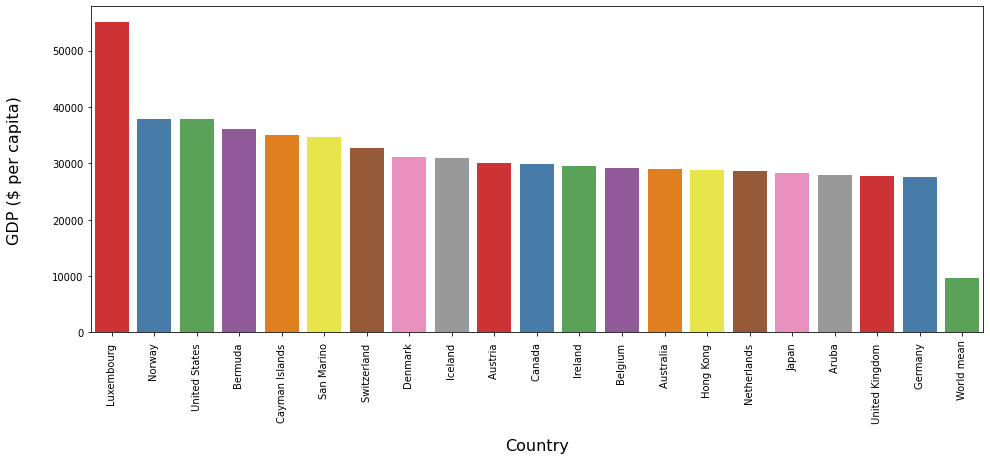

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
#ax = fig.add_subplot(111)
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[df['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)

sns.barplot(x='Country',y='GDP ($ per capita)',data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

No of countries by region

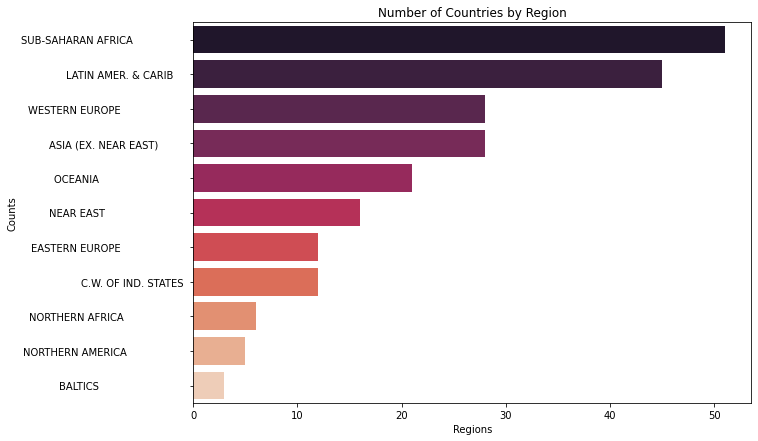

In [ ]:
region = df['Region'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(y=region.index, x=region.values, palette='rocket')
plt.title('Number of Countries by Region')
plt.xlabel('Regions')
plt.ylabel('Counts')
plt.show()

 GDP per region.

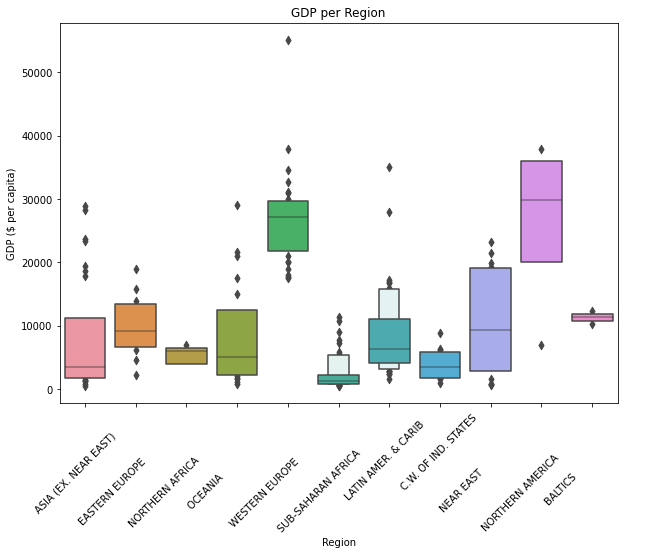

In [ ]:
plt.figure(figsize=(10,7))
sns.boxenplot(data=df, x='Region', y='GDP ($ per capita)')
plt.title('GDP per Region')
plt.xticks(rotation=45)
plt.show()

Pairplot

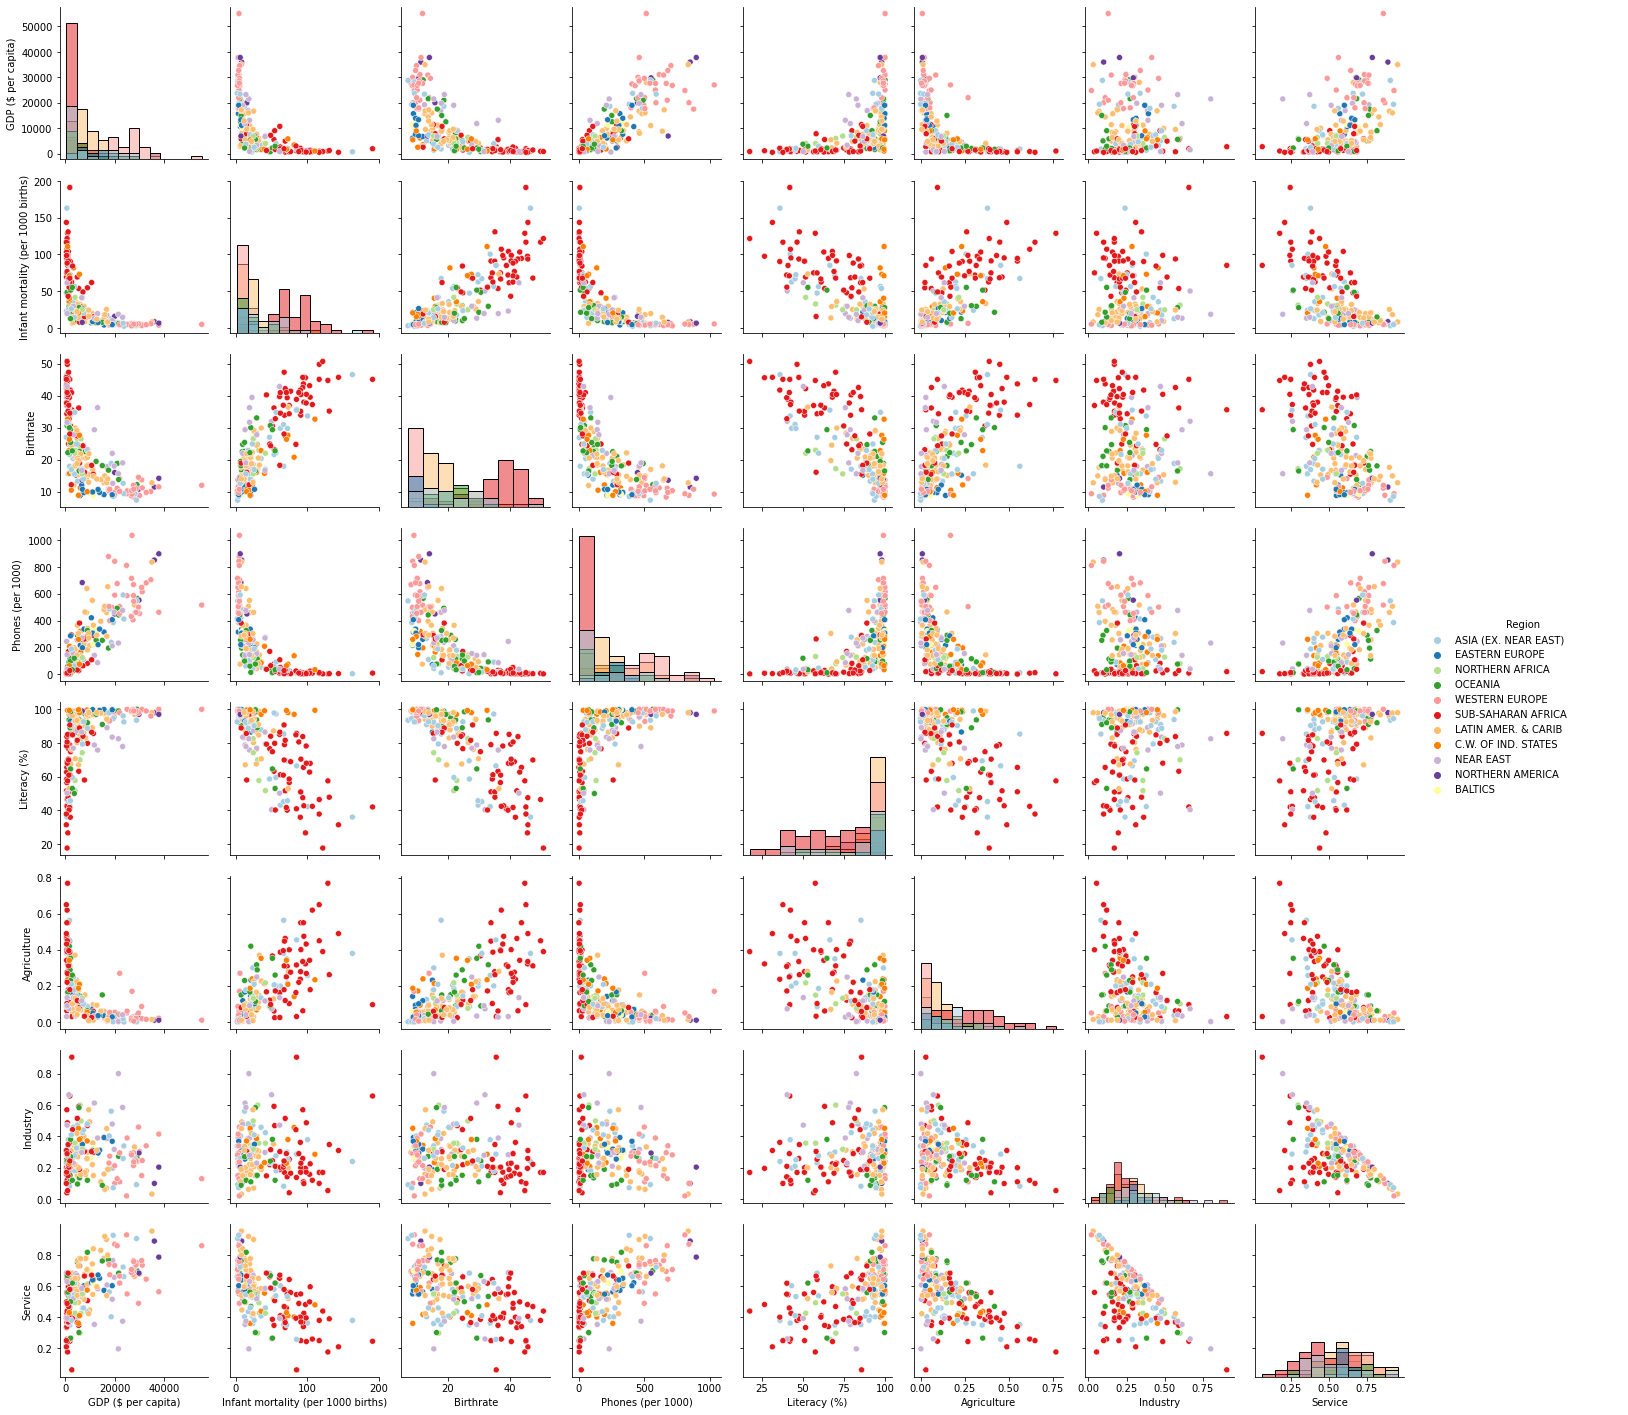

In [ ]:
x = df.loc[:,["Region","GDP ($ per capita)","Infant mortality (per 1000 births)","Birthrate","Phones (per 1000)","Literacy (%)","Agriculture","Industry","Service"]]
sns.pairplot(x, hue="Region",palette='Paired', diag_kind='hist')
plt.show()

Heatmap

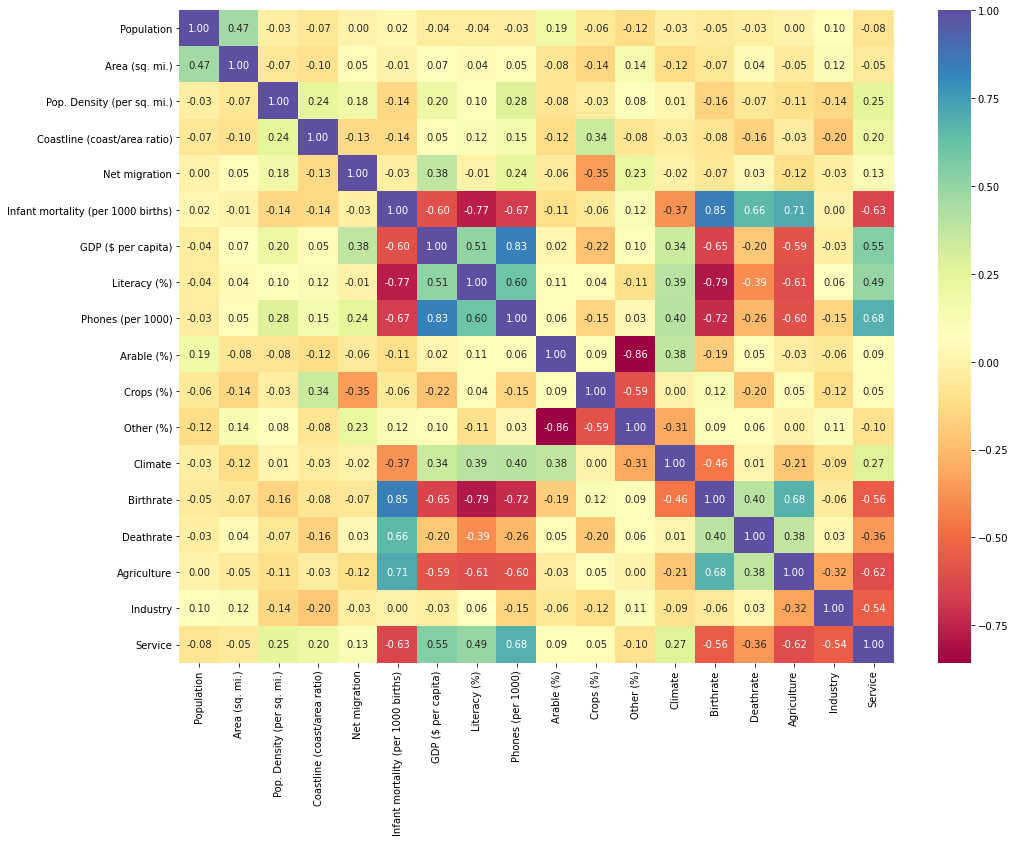

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='Spectral')
plt.show()

different sectors distribution in each region

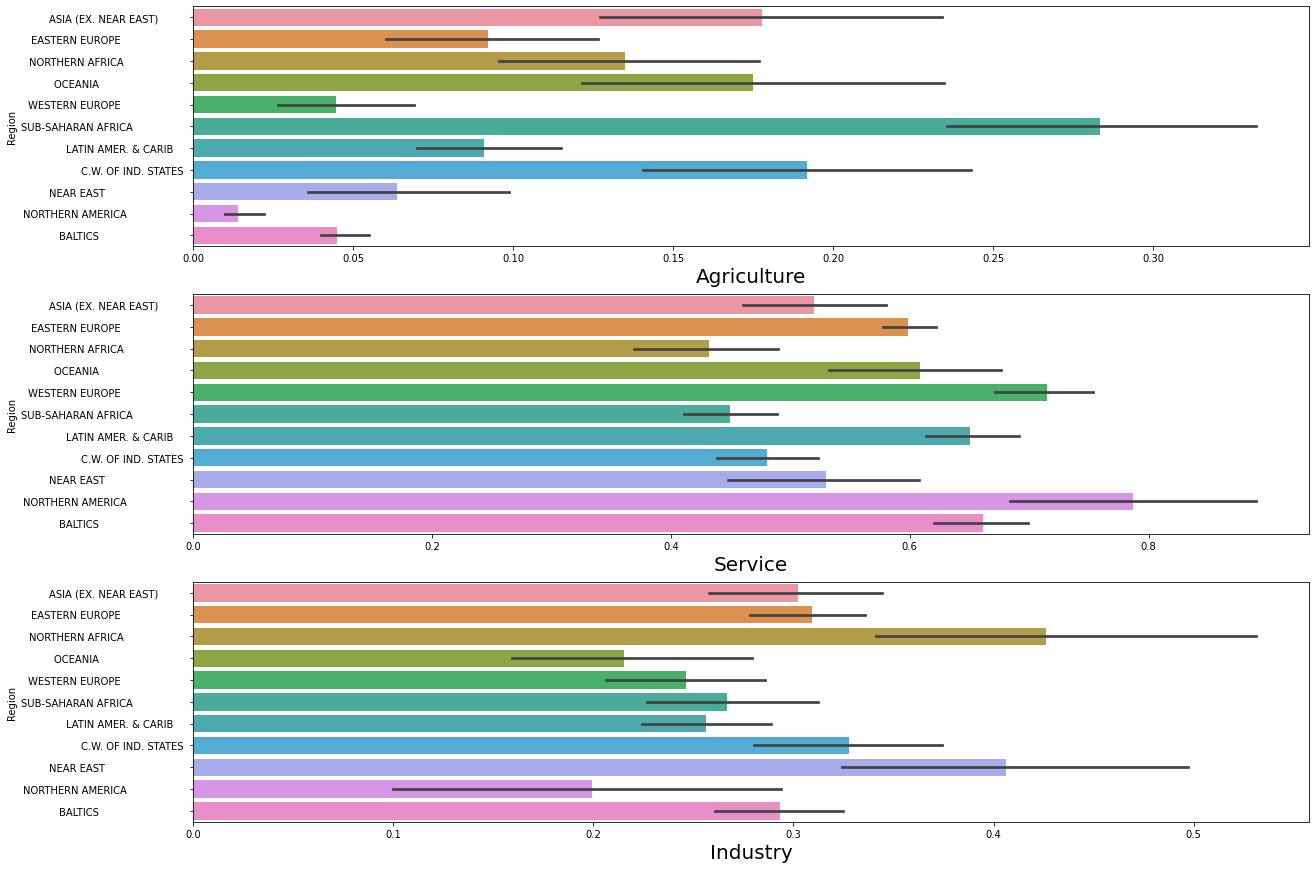

In [ ]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

sns.barplot(data=df, x='Agriculture', y='Region', ax=ax1)
sns.barplot(data=df, x='Service', y='Region', ax=ax2)
sns.barplot(data=df, x='Industry', y='Region', ax=ax3)

ax1.set_xlabel('Agriculture', fontsize=20)
ax2.set_xlabel('Service', fontsize=20)
ax3.set_xlabel('Industry', fontsize=20)

plt.show()

Data distribution of a variables against the density distribution using distplots

In [ ]:
df2 = df.rename(columns = {'Area (sq. mi.)': 'Area_sqmi', 'Pop. Density (per sq. mi.)': 'Pop_Density', 'Coastline (coast/area ratio)': 'Coastline_ratio', 'Net migration':'Net_migration','Infant mortality (per 1000 births)':'Infant_mortality_per1000births','GDP ($ per capita)': 'GDP_percapita', 'Literacy (%)': 'Literacy','Phones (per 1000)':'Phones_per1000','Arable (%)':'Arable','Crops (%)':'Crops', 'Other (%)':'Other',}, inplace = False)
df2.head()


,Country,Region,Population,Area_sqmi,Pop_Density,Coastline_ratio,Net_migration,Infant_mortality_per1000births,GDP_percapita,Literacy,Phones_per1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [ ]:
plt.figure(figsize=(30,30))

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


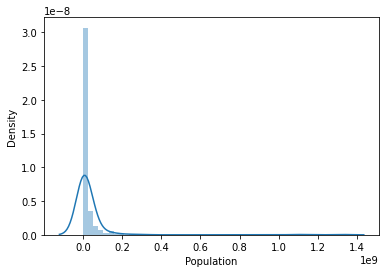

In [ ]:
sns.distplot(df2.Population)

In [ ]:
df2.Population.value_counts()

4303356     1
13902972    1
11987121    1
48846823    1
33241259    1
           ..
2460492     1
43593035    1
21152       1
5906760     1
114689      1
Name: Population, Length: 227, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


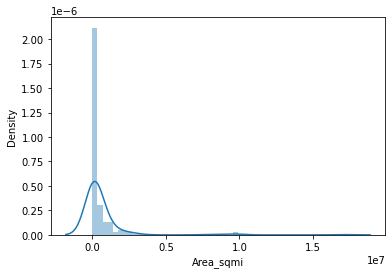

In [ ]:
sns.distplot(df2.Area_sqmi)

In [ ]:
df2.Area_sqmi.value_counts()

102         2
431         1
15007       1
27830       1
693         1
           ..
1219912     1
2166086     1
2381740     1
30528       1
17075200    1
Name: Area_sqmi, Length: 226, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


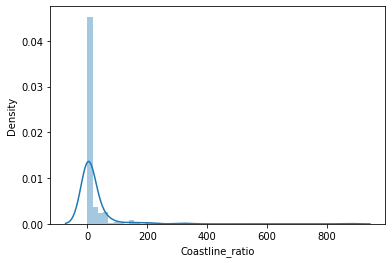

In [ ]:
sns.distplot(df2.Coastline_ratio)

In [ ]:
df2.Coastline_ratio.value_counts()

0.00     44
0.09      4
0.13      4
0.21      3
0.24      3
         ..
0.73      1
17.19     1
31.82     1
9.84      1
0.92      1
Name: Coastline_ratio, Length: 151, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


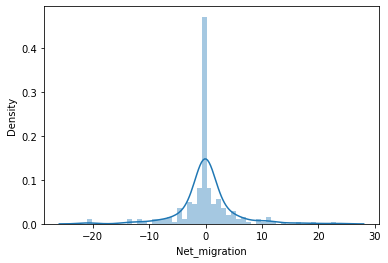

In [ ]:
sns.distplot(df2.Net_migration)

In [ ]:
df2.Net_migration.value_counts()

 0.00    62
-0.71     2
 4.05     2
 2.07     2
-0.39     2
         ..
 1.23     1
-0.67     1
 3.41     1
-1.33     1
-0.33     1
Name: Net_migration, Length: 157, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


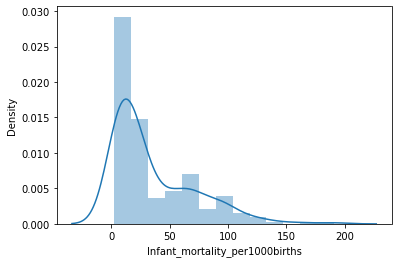

In [ ]:
sns.distplot(df2.Infant_mortality_per1000births)

In [ ]:
df2.Infant_mortality_per1000births.value_counts()

9.95     3
4.39     2
12.62    2
7.72     1
24.04    1
        ..
7.35     1
8.80     1
24.31    1
4.66     1
31.00    1
Name: Infant_mortality_per1000births, Length: 220, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


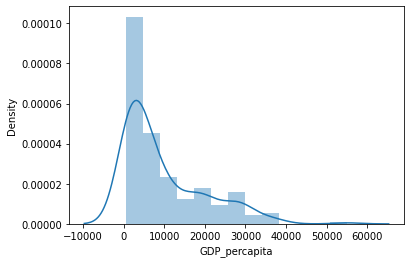

In [ ]:
sns.distplot(df2.GDP_percapita)

In [ ]:
df2.GDP_percapita.value_counts()

800.0      7
700.0      6
1900.0     5
1800.0     5
600.0      4
          ..
8300.0     1
36000.0    1
2700.0     1
16900.0    1
17200.0    1
Name: GDP_percapita, Length: 130, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


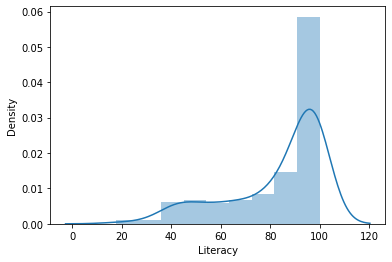

In [ ]:
sns.distplot(df2.Literacy)

In [ ]:
df2.Literacy.value_counts()

99.0     13
97.0     11
98.0     10
100.0     7
98.6      4
         ..
96.7      1
80.6      1
63.2      1
45.7      1
36.0      1
Name: Literacy, Length: 140, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


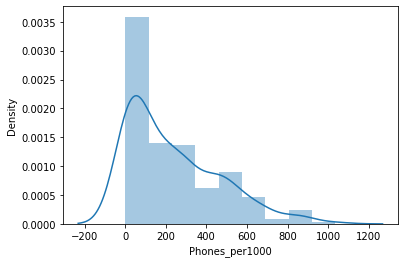

In [ ]:
sns.distplot(df2.Phones_per1000)

In [ ]:
df2.Phones_per1000.value_counts()

26.8     2
2.3      2
4.0      2
255.6    2
7.9      2
        ..
306.3    1
225.3    1
215.4    1
12.9     1
259.5    1
Name: Phones_per1000, Length: 214, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


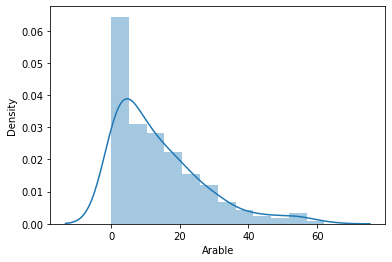

In [ ]:
sns.distplot(df2.Arable)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


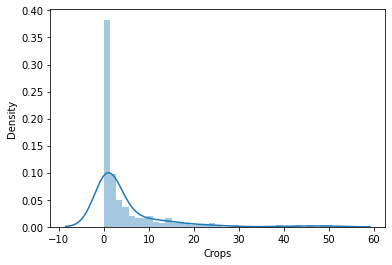

In [ ]:
sns.distplot(df2.Crops)

In [ ]:
df2.Crops.value_counts()

0.00    28
0.03     5
0.19     4
0.40     4
0.01     4
        ..
0.60     1
4.17     1
0.90     1
4.55     1
0.25     1
Name: Crops, Length: 162, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


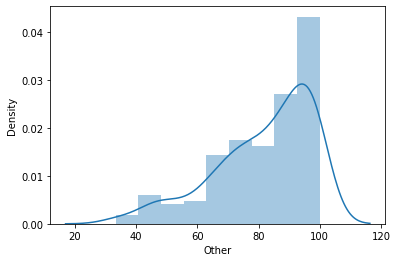

In [ ]:
sns.distplot(df2.Other)

In [ ]:
df2.Other.value_counts()

100.00    8
75.00     3
96.15     2
95.02     2
73.33     2
         ..
79.52     1
82.12     1
58.06     1
89.91     1
99.01     1
Name: Other, Length: 209, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


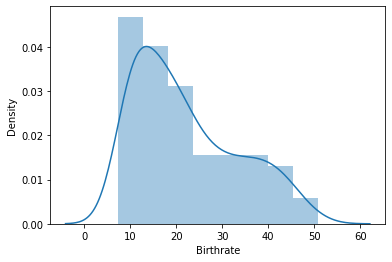

In [ ]:
sns.distplot(df2.Birthrate)

In [ ]:
df2.Birthrate.value_counts()

12.56    2
18.02    2
18.79    2
20.48    2
37.01    1
        ..
18.11    1
30.65    1
14.45    1
10.04    1
13.25    1
Name: Birthrate, Length: 220, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


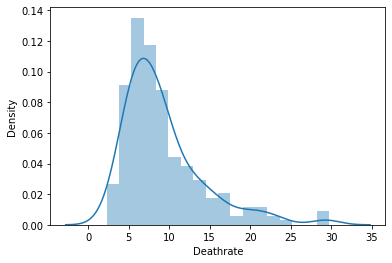

In [ ]:
sns.distplot(df2.Deathrate)

In [ ]:
df2.Deathrate.value_counts()

5.37     2
10.31    2
5.58     2
3.92     2
5.28     2
        ..
23.03    1
9.14     1
8.10     1
7.13     1
6.97     1
Name: Deathrate, Length: 201, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


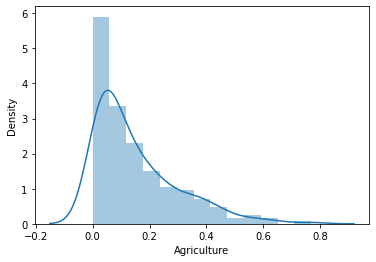

In [ ]:
sns.distplot(df2.Agriculture)

In [ ]:
df2.Agriculture.value_counts()

0.010    8
0.040    6
0.030    5
0.060    4
0.018    4
        ..
0.206    1
0.463    1
0.121    1
0.258    1
0.448    1
Name: Agriculture, Length: 150, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


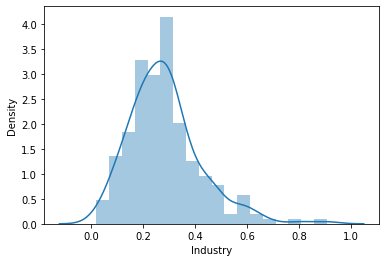

In [ ]:
sns.distplot(df2.Industry)

In [ ]:
df2.Industry.value_counts()

0.170    4
0.110    4
0.304    3
0.100    3
0.120    3
        ..
0.092    1
0.262    1
0.325    1
0.138    1
0.286    1
Name: Industry, Length: 155, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


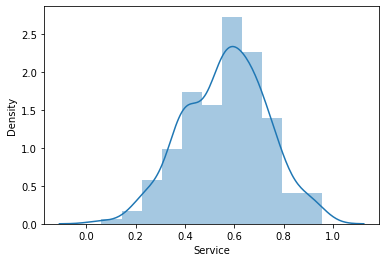

In [ ]:
sns.distplot(df2.Service)

In [ ]:
df2.Service.value_counts()

0.684    5
0.620    4
0.550    4
0.579    3
0.549    3
        ..
0.260    1
0.540    1
0.197    1
0.699    1
0.615    1
Name: Service, Length: 167, dtype: int64

Top Factors affecting GDP per capita

In [ ]:
df2.corr()['GDP_percapita'].sort_values()

Birthrate                        -0.650137
Infant_mortality_per1000births   -0.600774
Agriculture                      -0.586769
Crops                            -0.219229
Deathrate                        -0.201661
Population                       -0.039324
Industry                         -0.028926
Arable                            0.019768
Coastline_ratio                   0.049118
Area_sqmi                         0.072185
Other                             0.097828
Pop_Density                       0.195773
Climate                           0.340791
Net_migration                     0.382461
Literacy                          0.513144
Service                           0.550216
Phones_per1000                    0.834499
GDP_percapita                     1.000000
Name: GDP_percapita, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


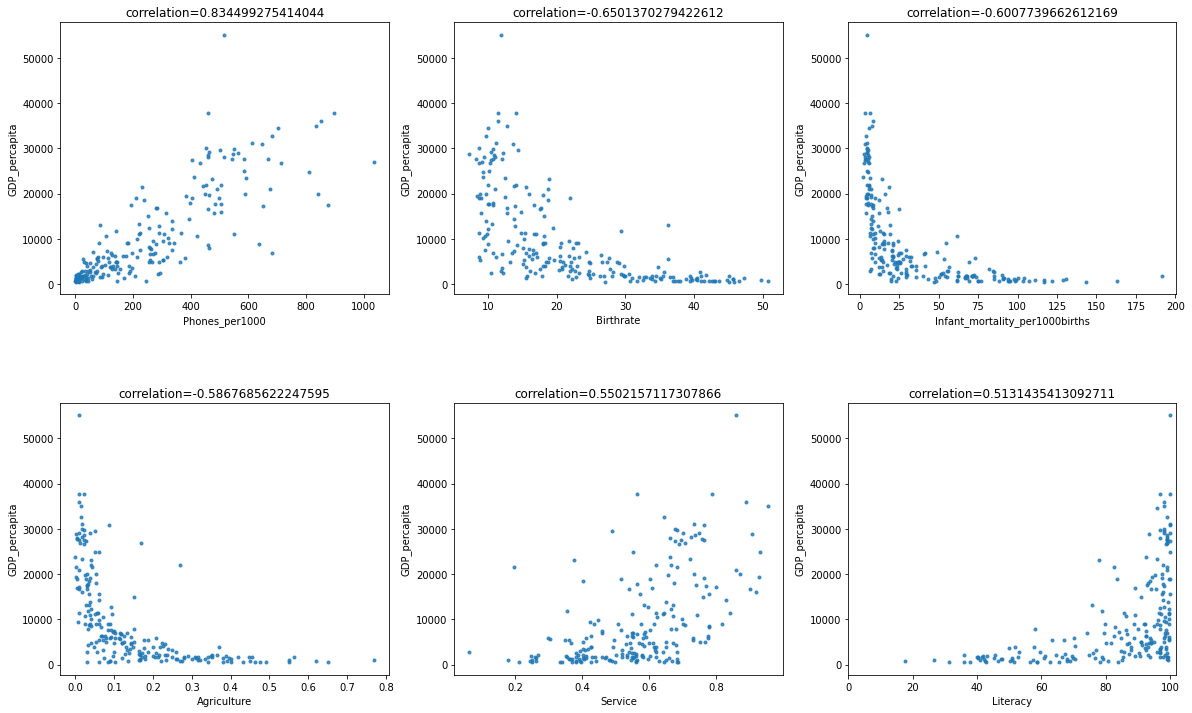

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df2.columns.values[2:]:
    if ((col!='GDP_percapita')&(col!='Climate')):
        corr_to_gdp[col] = df2['GDP_percapita'].corr(df2[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP_percapita', data=df2,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [ ]:
df3=df2.sort_values("GDP_percapita",ascending=False)

df3.head()

,Country,Region,Population,Area_sqmi,Pop_Density,Coastline_ratio,Net_migration,Infant_mortality_per1000births,GDP_percapita,Literacy,Phones_per1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,515.4,23.28,0.40,76.32,NaN,11.94,8.41,0.010,0.130,0.860
154,Norway,WESTERN EUROPE,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,0.00,97.13,3.0,11.46,9.40,0.021,0.415,0.564
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
22,Bermuda,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,20.00,0.00,80.00,2.0,11.40,7.74,0.010,0.100,0.890
38,Cayman Islands,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,8.19,35000.0,98.0,836.3,3.85,0.00,96.15,2.0,12.74,4.89,0.014,0.032,0.954


In [ ]:
df3.tail()

,Country,Region,Population,Area_sqmi,Pop_Density,Coastline_ratio,Net_migration,Infant_mortality_per1000births,GDP_percapita,Literacy,Phones_per1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
125,Malawi,SUB-SAHARAN AFRICA,13013926,118480,109.8,0.00,0.00,103.32,600.0,62.7,7.9,23.38,1.49,75.13,2.0,43.13,19.33,0.342,0.158,0.499
183,Sierra Leone,SUB-SAHARAN AFRICA,6005250,71740,83.7,0.56,0.00,143.64,500.0,31.4,4.0,6.98,0.89,92.13,2.0,45.76,23.03,0.490,0.310,0.210
188,Somalia,SUB-SAHARAN AFRICA,8863338,637657,13.9,0.47,5.37,116.70,500.0,37.8,11.3,1.67,0.04,98.29,1.0,45.13,16.63,0.650,0.100,0.250
58,East Timor,ASIA (EX. NEAR EAST),1062777,15007,70.8,4.70,0.00,47.41,500.0,58.6,NaN,4.71,0.67,94.62,2.0,26.99,6.24,0.085,0.231,0.684
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400


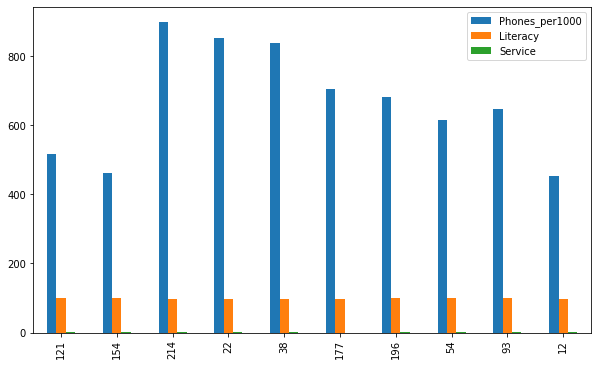

In [ ]:
df3 = pd.DataFrame(data=df3, columns=["Phones_per1000","Literacy","Service"])
df3.head(10).plot.bar(figsize=(10,6))
plt.show()

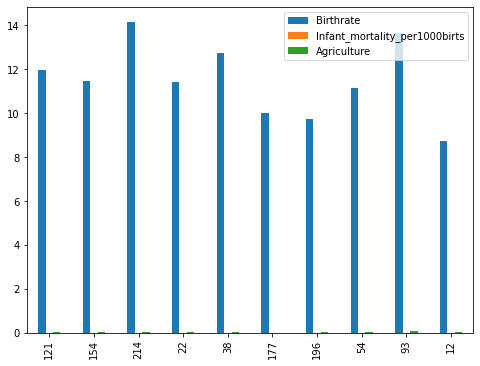

In [ ]:
df3 = pd.DataFrame(data=df3, columns=["Birthrate","Infant_mortality_per1000birts","Agriculture"])
df3.head(10).plot.bar(figsize=(8,6))
plt.show()

Countries with low Birthrate and low GDP per capita

In [ ]:
df.loc[(df['Birthrate']<14)&(df['GDP ($ per capita)']<10000)]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418
18,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4.0,11.16,14.02,0.093,0.316,0.591
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
30,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,0.32,-4.58,20.55,7600.0,98.6,336.3,40.02,1.92,58.06,3.0,9.65,14.27,0.093,0.304,0.603
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
51,Cuba,LATIN AMER. & CARIB,11382820,110860,102.7,3.37,-1.58,6.33,2900.0,97.0,74.7,33.05,7.60,59.35,2.0,11.89,7.22,0.055,0.261,0.684
75,Georgia,C.W. OF IND. STATES,4661473,69700,66.9,0.44,-4.70,18.59,2500.0,99.0,146.6,11.44,3.86,84.70,3.0,10.41,9.23,0.172,0.275,0.553
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,NaN,260.0,22.26,1.81,75.93,3.0,12.02,8.77,0.118,0.319,0.563
168,Romania,EASTERN EUROPE,22303552,237500,93.9,0.09,-0.13,26.43,7000.0,98.4,196.9,40.82,2.25,56.93,3.0,10.70,11.77,0.101,0.350,0.549
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,0.11,92.56,NaN,9.95,14.65,0.054,0.371,0.575


Total GDP

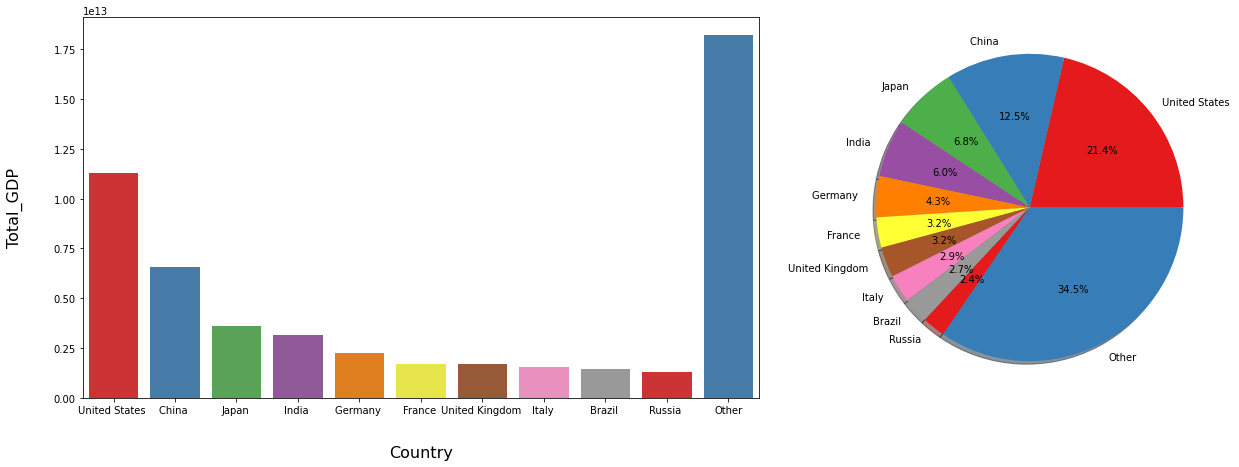

In [ ]:
df['Total_GDP ($)'] = df['GDP ($ per capita)'] * df['Population']
#plt.figure(figsize=(16,6))
top_gdp_countries = df.sort_values('Total_GDP ($)',ascending=False).head(10)
other = pd.DataFrame({'Country':['Other'], 'Total_GDP ($)':[df['Total_GDP ($)'].sum() - top_gdp_countries['Total_GDP ($)'].sum()]})
gdps = pd.concat([top_gdp_countries[['Country','Total_GDP ($)']],other],ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7),gridspec_kw = {'width_ratios':[2,1]})
sns.barplot(x='Country',y='Total_GDP ($)',data=gdps,ax=axes[0],palette='Set1')
axes[0].set_xlabel('Country',labelpad=30,fontsize=16)
axes[0].set_ylabel('Total_GDP',labelpad=30,fontsize=16)

colors = sns.color_palette("Set1", gdps.shape[0]).as_hex()
axes[1].pie(gdps['Total_GDP ($)'], labels=gdps['Country'],colors=colors,autopct='%1.1f%%',shadow=True)
axes[1].axis('equal')
plt.show()


above ten countries rank in total GDP and GDP per capita


In [ ]:
Rank1 = df[['Country','Total_GDP ($)']].sort_values('Total_GDP ($)', ascending=False).reset_index()
Rank1 = pd.Series(Rank1.index.values+1, index=Rank1.Country)
Rank1.loc[top_gdp_countries.Country]

Country
United States       1
China               2
Japan               3
India               4
Germany             5
France              6
United Kingdom      7
Italy               8
Brazil              9
Russia             10
dtype: int64

In [ ]:
Rank2 = df[['Country','GDP ($ per capita)']].sort_values('GDP ($ per capita)', ascending=False).reset_index()
Rank2 = pd.Series(Rank2.index.values+1, index=Rank2.Country)
Rank2.loc[top_gdp_countries.Country]

Country
United States        3
China              121
Japan               17
India              150
Germany             20
France              21
United Kingdom      19
Italy               25
Brazil              92
Russia              85
dtype: int64

compare the above ten countries’ rank in total GDP and GDP per capita.

In [ ]:
Rank_change = (Rank2-Rank1).sort_values(ascending=False)
print('Country -rank of total GDP - rank of GDP per capita:')
Rank_change.loc[top_gdp_countries.Country]

Country -rank of total GDP - rank of GDP per capita:


Country
United States        2
China              119
Japan               14
India              146
Germany             15
France              15
United Kingdom      12
Italy               17
Brazil              83
Russia              75
dtype: int64

Factors affecting Total GDP

In [ ]:
corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='Total_GDP ($)')&(col!='Climate')&(col!='GDP ($ per capita)')):
        corr_to_gdp[col] = df['Total_GDP ($)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]
print(corr_to_gdp)

Population                            0.639435
Area (sq. mi.)                        0.556312
Phones (per 1000)                     0.232506
Birthrate                            -0.168497
Agriculture                          -0.146380
Arable (%)                            0.128978
Infant mortality (per 1000 births)   -0.123894
Literacy (%)                          0.110977
Service                               0.094829
Crops (%)                            -0.078896
Coastline (coast/area ratio)         -0.065539
Other (%)                            -0.063273
Net migration                         0.054543
Industry                              0.043278
Deathrate                            -0.038199
Pop. Density (per sq. mi.)           -0.028738
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


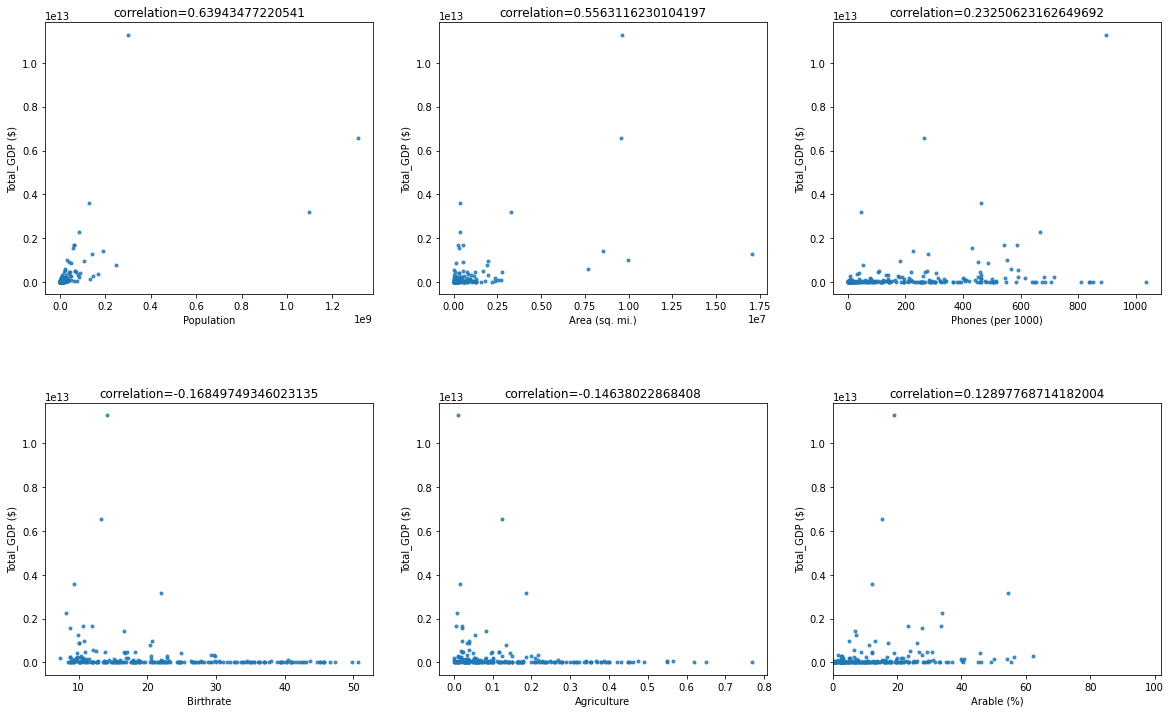

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='Total_GDP ($)', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

Comparison of the Top 10 countries

in terms of sectors

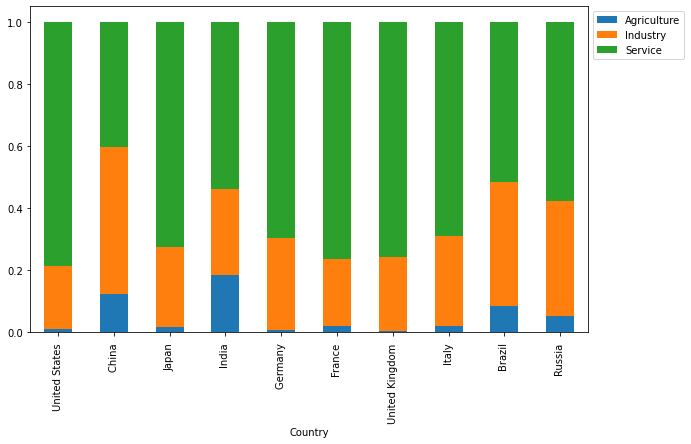

In [ ]:
plot_data = top_gdp_countries.head(10)[['Country','Agriculture', 'Industry', 'Service']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

in terms of land usage

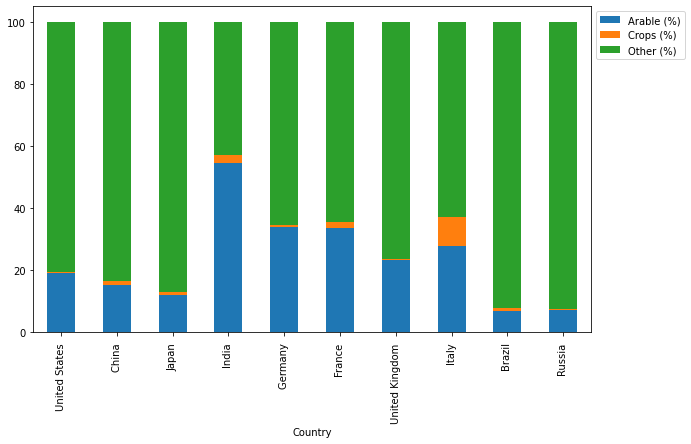

In [ ]:
plot_data = top_gdp_countries[['Country','Arable (%)', 'Crops (%)', 'Other (%)']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

in terms of Infant mortality, birthrate,deathrate,net migration

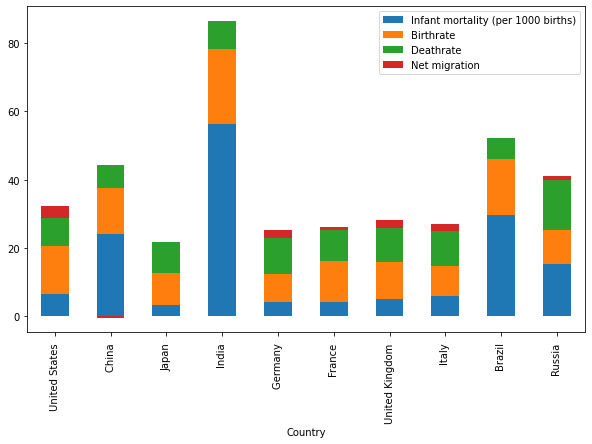

In [ ]:
plot_data = top_gdp_countries[['Country','Infant mortality (per 1000 births)', 'Birthrate', 'Deathrate','Net migration']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

Comparision for least 10 countries

In [ ]:
least_gdp_countries=df.sort_values('Total_GDP ($)',ascending=True).head(10)

in terms of sectors

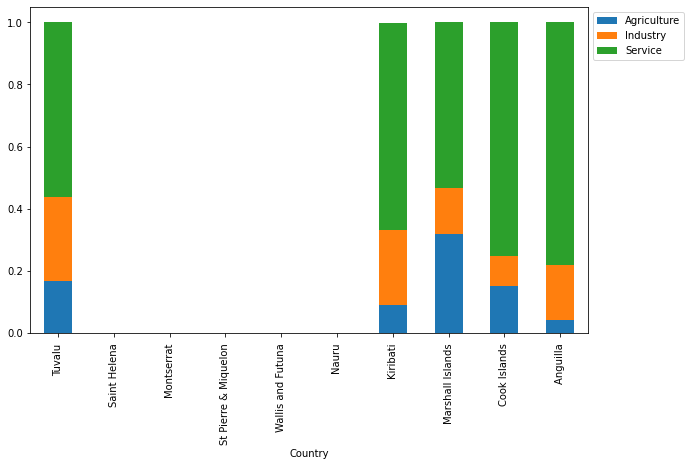

In [ ]:
plot_data = least_gdp_countries.head(10)[['Country','Agriculture', 'Industry', 'Service']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

in terms of land usage

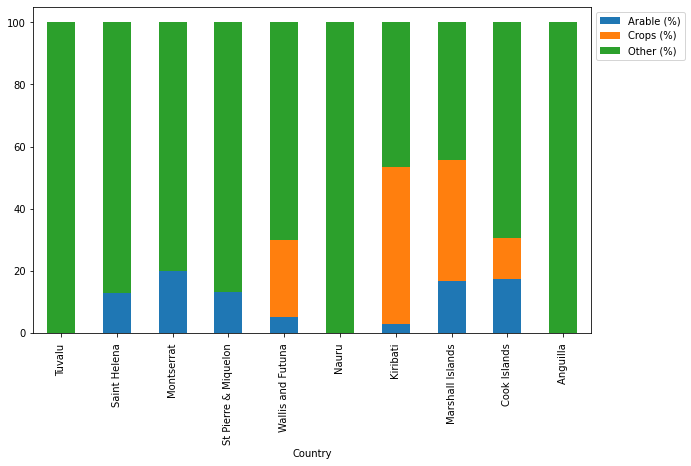

In [ ]:
plot_data = least_gdp_countries[['Country','Arable (%)', 'Crops (%)', 'Other (%)']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

in terms of infant mortality.birthrate,deathrate,net migration

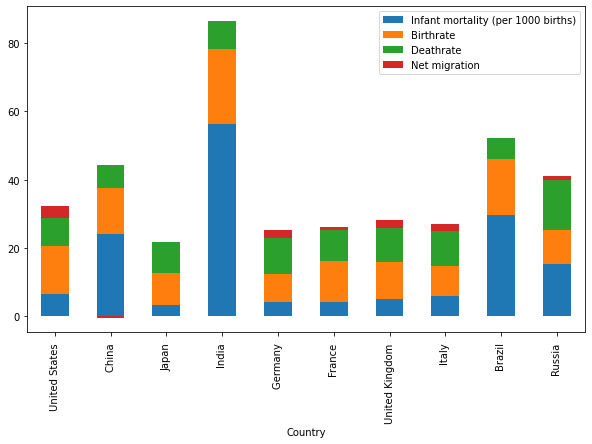

In [ ]:
plot_data = top_gdp_countries[['Country','Infant mortality (per 1000 births)', 'Birthrate', 'Deathrate','Net migration']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()